In [36]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import StandardScaler

In [37]:
data = load_diabetes()
df = pd.DataFrame( data.data, columns = data.feature_names )
df['target'] = data.target
df.head(5)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


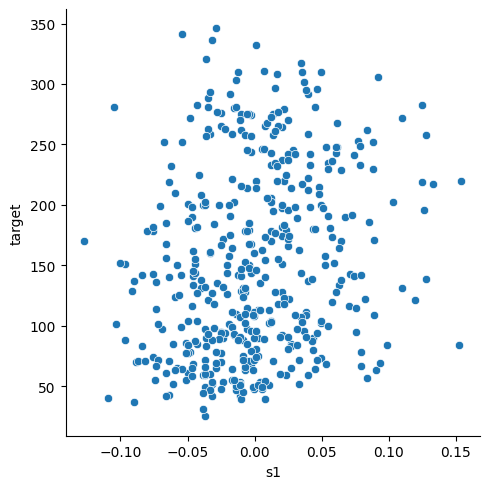

In [38]:
%matplotlib inline
data = df[['s1', 'target']]
import seaborn as sns
sns.relplot(
    data = data,
    x="s1", y="target",
)

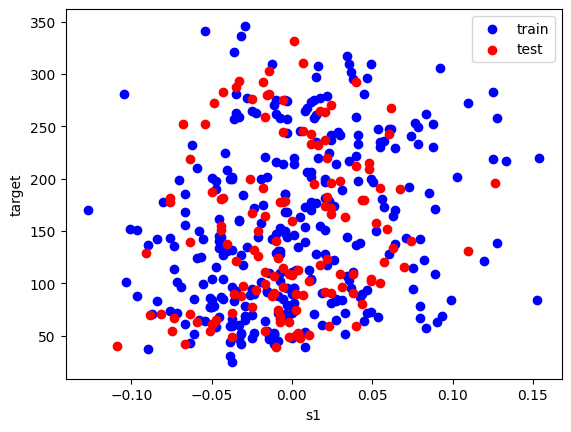

In [39]:
from sklearn.model_selection import train_test_split
X = df[['s1']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

plt.scatter(X_train, y_train, c='b', label='train')
plt.scatter(X_test, y_test, c='r', label='test')
plt.xlabel('s1')
plt.ylabel('target')
plt.legend()
plt.show()

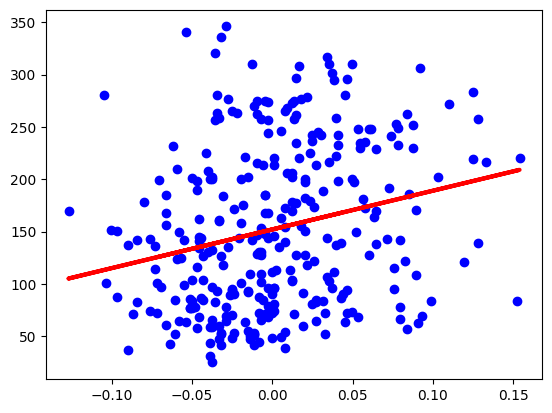

In [40]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit( X_train, y_train)
line = reg.coef_ * X_train + reg.intercept_ # y = kx + b
plt.scatter(X_train, y_train, c='b', label='train')
plt.plot( X_train, line, linewidth = 3, c = 'red' )
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def metrics( model, X_test, y_test, y_pred ):
    mae = mean_absolute_error( y_test, y_pred )
    mse = mean_squared_error( y_test, y_pred )
    score = model.score( X_test, y_test )
    print( "MSE = {:.2f}, MAE = {:.2f}, Score_R2 = {:.2f}%".format(mae, mse, score*100))

y_pred = reg.predict(X_test)
metrics( reg, X_test, y_test, y_pred)

MSE = 64.10, MAE = 5682.17, Score_R2 = 1.53%


We can see the result is very bad because there is no linear dependance between our parameters and using Linear Regression is useless here.
Let`s try use all feautures and observe the result:

In [42]:
X = df.drop(['target'], axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

reg.fit( X_train, y_train)
y_pred = reg.predict(X_test)
metrics( reg, X_test, y_test, y_pred )

MSE = 45.36, MAE = 3157.57, Score_R2 = 45.28%


In [43]:
model_L1_LassoCV = linear_model.LassoCV( cv = 10 ).fit( X_train, y_train )
model_L2_RidgeCV = linear_model.RidgeCV( cv = 10 ).fit( X_train, y_train )
model_ElasticNetCV = linear_model.ElasticNetCV( cv = 10, selection='random', l1_ratio=0.75 ).fit( X_train, y_train ) # Combined L1, L2 as regularizer

y_pred_Lasso = model_L1_LassoCV.predict(X_test)
y_pred_Ridge = model_L2_RidgeCV.predict(X_test)
y_pred_ElasticNet = model_ElasticNetCV.predict(X_test)

metrics( model_L1_LassoCV, X_test, y_test, y_pred_Lasso )
metrics( model_L2_RidgeCV, X_test, y_test, y_pred_Ridge )
metrics( model_ElasticNetCV, X_test, y_test, y_pred_ElasticNet )

MSE = 45.30, MAE = 3170.86, Score_R2 = 45.05%
MSE = 45.56, MAE = 3175.56, Score_R2 = 44.97%
MSE = 46.33, MAE = 3219.35, Score_R2 = 44.21%


We can see that result improved, but still linear regression does not work here very well because there is no visible linear dependance between features and there is no trend, direction in which data is propogating!